## 第三堂

In [1]:
import numpy as np
import pandas as pd

In [46]:
df=pd.read_excel('data.xlsx',sheet_name='成績總表')
df.head()

考生姓名  ID   國文   數學   英文   地理   歷史   生物   物理   化學
0  陳小明   1   59   54   58   41   76   42   39   75
1  王小強   2  100  100  100  100  100  100  100  100
2  林小飛   3   41   51   71   64   42   41   57   71
3  鄭小新   4    0    0    0    0    0    0    0    0
4  陳小路   5    3    5    4    3    3    4    3    4

In [4]:
df2=pd.read_excel('data.xlsx',sheet_name='大學分布')
df2.head()

學校系所    國文    數學    英文    地理    歷史    生物    物理    化學  總計
0  台大中文系  0.60  0.02  0.03  0.10  0.10  0.02  0.05  0.08   1
1  台大英文系  0.15  0.04  0.68  0.01  0.05  0.02  0.02  0.03   1
2  台大電機系  0.01  0.05  0.20  0.02  0.02  0.10  0.30  0.30   1
3  交大化工系  0.01  0.30  0.10  0.02  0.01  0.20  0.20  0.16   1
4  交大英文系  0.05  0.10  0.50  0.10  0.10  0.05  0.05  0.05   1

In [19]:
nn=df.iloc[:,2:].values
nn

array([[ 59,  54,  58,  41,  76,  42,  39,  75],
       [100, 100, 100, 100, 100, 100, 100, 100],
       [ 41,  51,  71,  64,  42,  41,  57,  71],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   5,   4,   3,   3,   4,   3,   4],
       [100,  88,  70, 100,  80,  96,  99,  90],
       [100,  88,  70,  36,  58,  52,  36,  61],
       [100,  88,  70,  80,  90,  30,  37,  95],
       [ 33,  39,  25,  21,  37,  22,  24,  11],
       [ 28,  31,  22,  29,  25,  33,  30,  26],
       [ 79,  84,  74,  73,  45,  59,  73,  60],
       [ 19,  21,  17,  16,  18,  18,  16,  17],
       [ 53,  38,  48,  35,  47,  38,  45,  34],
       [ 69,  55,  71,  77,  84,  61,  50,  66],
       [ 87,  97,  74,  83,  60,  70,  61,  87],
       [ 36,  31,  48,  31,  51,  47,  53,  48],
       [ 38,  31,  37,  44,  36,  33,  39,  29],
       [ 47,  56,  38,  45,  49,  35,  30,  51],
       [ 87,  77,  47,  52,  72,  84,  51,  50],
       [ 45,  33,  41,  28,  36,  35,  24,  23],
       [ 39,  43,  6

In [18]:
nn2=df2.iloc[:,1:-1].values
nn2

array([[0.6 , 0.02, 0.03, 0.1 , 0.1 , 0.02, 0.05, 0.08],
       [0.15, 0.04, 0.68, 0.01, 0.05, 0.02, 0.02, 0.03],
       [0.01, 0.05, 0.2 , 0.02, 0.02, 0.1 , 0.3 , 0.3 ],
       [0.01, 0.3 , 0.1 , 0.02, 0.01, 0.2 , 0.2 , 0.16],
       [0.05, 0.1 , 0.5 , 0.1 , 0.1 , 0.05, 0.05, 0.05],
       [0.02, 0.25, 0.1 , 0.01, 0.01, 0.01, 0.4 , 0.2 ],
       [0.01, 0.12, 0.3 , 0.1 , 0.01, 0.01, 0.4 , 0.05],
       [0.01, 0.1 , 0.18, 0.1 , 0.01, 0.05, 0.5 , 0.05],
       [0.02, 0.1 , 0.7 , 0.1 , 0.03, 0.03, 0.01, 0.01]])

In [23]:
nn2=nn2.transpose()
nn2

array([[0.6 , 0.15, 0.01, 0.01, 0.05, 0.02, 0.01, 0.01, 0.02],
       [0.02, 0.04, 0.05, 0.3 , 0.1 , 0.25, 0.12, 0.1 , 0.1 ],
       [0.03, 0.68, 0.2 , 0.1 , 0.5 , 0.1 , 0.3 , 0.18, 0.7 ],
       [0.1 , 0.01, 0.02, 0.02, 0.1 , 0.01, 0.1 , 0.1 , 0.1 ],
       [0.1 , 0.05, 0.02, 0.01, 0.1 , 0.01, 0.01, 0.01, 0.03],
       [0.02, 0.02, 0.1 , 0.2 , 0.05, 0.01, 0.01, 0.05, 0.03],
       [0.05, 0.02, 0.3 , 0.2 , 0.05, 0.4 , 0.4 , 0.5 , 0.01],
       [0.08, 0.03, 0.3 , 0.16, 0.05, 0.2 , 0.05, 0.05, 0.01]])

In [36]:
result=nn.dot(nn2)
ff=pd.DataFrame(result)
ff.columns=df2['學校系所']
ff['考生姓名']=df['考生姓名']

# ff.index=df['考生姓名']
ff

學校系所   台大中文系   台大英文系   台大電機系   交大化工系   交大英文系   交大理工系   成大電機系   政大物理系   政大英文系  \
0      58.71   58.53   55.63   52.37   56.85   52.67   49.10   46.64   55.96   
1     100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00   
2      47.70   63.30   61.78   55.47   61.70   59.14   61.41   59.21   65.79   
3       0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
4       3.17    3.81    3.70    4.06    3.80    3.81    3.60    3.48    3.94   
5      95.93   77.72   89.30   90.60   81.05   91.36   88.42   92.00   76.97   
6      80.98   72.97   55.58   63.06   65.65   59.06   54.71   50.23   67.67   
7      90.91   75.61   65.40   65.50   73.90   66.80   61.31   56.05   72.72   
8      29.65   26.82   21.14   26.28   26.70   25.51   25.35   24.85   26.28   
9      27.72   23.98   27.41   29.37   25.35   28.58   27.38   28.44   24.26   
10     72.73   72.95   67.95   71.30   70.75   72.95   73.61   72.71   73.53   
11     18.25   17.50   17.02   18.21   17.50   17.65   17.02   16.88   17.39   
12     47.93   47.49   41.17   39.94   44.50   41.36   43.54   43.04   45.30   
13     69.73   70.00   61.76   59.43   69.40   57.65   61.04   58.86   69.79   
14     82.07   76.31   74.78   79.75   76.25   77.32   73.06   71.14   76.92   
15     39.29   45.58   48.15   43.27   44.50   45.36   46.16   46.96   44.47   
16     37.46   36.65   34.63   33.66   36.55   34.74   37.34   37.50   36.91   
17     46.14   40.86   40.55   43.62   42.15   42.23   38.48   37.20   40.97   
18     75.78   56.41   55.30   65.43   57.20   58.17   53.87   55.15   53.23   
19     39.03   39.90   29.18   30.85   36.55   28.44   30.97   29.19   38.30   
20     43.84   57.55   50.80   47.03   55.55   47.19   50.35   47.73   58.80   

學校系所 考生姓名  
0     陳小明  
1     王小強  
2     林小飛  
3     鄭小新  
4     陳小路  
5     黃小意  
6     蘇小傑  
7     吳小冠  
8     黃小敏  
9     張小月  
10    賴小如  
11    侯小茗  
12    鄭小晞  
13    金小武  
14    張小貴  
15    許小揚  
16    劉小華  
17    陳小寶  
18    趙小民  
19    鄧小貴  
20    何小魚

## 成績單加總，主科欄位，排序

In [47]:
df['總分']=df.iloc[:,2:].sum(axis=1)

In [49]:
df.head()

考生姓名  ID   國文   數學   英文   地理   歷史   生物   物理   化學   總分
0  陳小明   1   59   54   58   41   76   42   39   75  444
1  王小強   2  100  100  100  100  100  100  100  100  800
2  林小飛   3   41   51   71   64   42   41   57   71  438
3  鄭小新   4    0    0    0    0    0    0    0    0    0
4  陳小路   5    3    5    4    3    3    4    3    4   29

In [56]:
df['主科']=df[['國文','數學','英文']].sum(axis=1)
df.head()

考生姓名  ID   國文   數學   英文   地理   歷史   生物   物理   化學   總分   主科
0  陳小明   1   59   54   58   41   76   42   39   75  444  171
1  王小強   2  100  100  100  100  100  100  100  100  800  300
2  林小飛   3   41   51   71   64   42   41   57   71  438  163
3  鄭小新   4    0    0    0    0    0    0    0    0    0    0
4  陳小路   5    3    5    4    3    3    4    3    4   29   12

In [58]:
df.sort_values(by='主科',ascending=False)

考生姓名  ID   國文   數學   英文   地理   歷史   生物   物理   化學   總分   主科
1   王小強   2  100  100  100  100  100  100  100  100  800  300
14  張小貴  15   87   97   74   83   60   70   61   87  619  258
5   黃小意   6  100   88   70  100   80   96   99   90  723  258
6   蘇小傑   7  100   88   70   36   58   52   36   61  501  258
7   吳小冠   8  100   88   70   80   90   30   37   95  590  258
10  賴小如  11   79   84   74   73   45   59   73   60  547  237
18  趙小民  19   87   77   47   52   72   84   51   50  520  211
13  金小武  14   69   55   71   77   84   61   50   66  533  195
0   陳小明   1   59   54   58   41   76   42   39   75  444  171
2   林小飛   3   41   51   71   64   42   41   57   71  438  163
20  何小魚  21   39   43   64   51   52   43   42   55  389  146
17  陳小寶  18   47   56   38   45   49   35   30   51  351  141
12  鄭小晞  13   53   38   48   35   47   38   45   34  338  139
19  鄧小貴  20   45   33   41   28   36   35   24   23  265  119
15  許小揚  16   36   31   48   31   51   47   53   48  345  115
16  劉小華  17   38   31   37   44   36   33   39   29  287  106
8   黃小敏   9   33   39   25   21   37   22   24   11  212   97
9   張小月  10   28   31   22   29   25   33   30   26  224   81
11  侯小茗  12   19   21   17   16   18   18   16   17  142   57
4   陳小路   5    3    5    4    3    3    4    3    4   29   12
3   鄭小新   4    0    0    0    0    0    0    0    0    0    0

In [64]:
df=df.sort_values(by=['主科','總分'],ascending=False)

In [69]:
df.index=np.arange(len(df))
df

考生姓名  ID   國文   數學   英文   地理   歷史   生物   物理   化學   總分   主科
0   王小強   2  100  100  100  100  100  100  100  100  800  300
1   黃小意   6  100   88   70  100   80   96   99   90  723  258
2   張小貴  15   87   97   74   83   60   70   61   87  619  258
3   吳小冠   8  100   88   70   80   90   30   37   95  590  258
4   蘇小傑   7  100   88   70   36   58   52   36   61  501  258
5   賴小如  11   79   84   74   73   45   59   73   60  547  237
6   趙小民  19   87   77   47   52   72   84   51   50  520  211
7   金小武  14   69   55   71   77   84   61   50   66  533  195
8   陳小明   1   59   54   58   41   76   42   39   75  444  171
9   林小飛   3   41   51   71   64   42   41   57   71  438  163
10  何小魚  21   39   43   64   51   52   43   42   55  389  146
11  陳小寶  18   47   56   38   45   49   35   30   51  351  141
12  鄭小晞  13   53   38   48   35   47   38   45   34  338  139
13  鄧小貴  20   45   33   41   28   36   35   24   23  265  119
14  許小揚  16   36   31   48   31   51   47   53   48  345  115
15  劉小華  17   38   31   37   44   36   33   39   29  287  106
16  黃小敏   9   33   39   25   21   37   22   24   11  212   97
17  張小月  10   28   31   22   29   25   33   30   26  224   81
18  侯小茗  12   19   21   17   16   18   18   16   17  142   57
19  陳小路   5    3    5    4    3    3    4    3    4   29   12
20  鄭小新   4    0    0    0    0    0    0    0    0    0    0

In [70]:
df.describe()

ID          國文          數學          英文          地理         歷史  \
count  21.000000   21.000000   21.000000   21.000000   21.000000   21.00000   
mean   11.000000   55.380952   52.857143   49.952381   48.047619   50.52381   
std     6.204837   31.969479   29.903655   25.998993   29.088617   26.92326   
min     1.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
25%     6.000000   36.000000   31.000000   37.000000   29.000000   36.00000   
50%    11.000000   47.000000   51.000000   48.000000   44.000000   49.00000   
75%    16.000000   87.000000   84.000000   70.000000   73.000000   72.00000   
max    21.000000  100.000000  100.000000  100.000000  100.000000  100.00000   

               生物          物理          化學          總分          主科  
count   21.000000   21.000000   21.000000   21.000000   21.000000  
mean    44.904762   43.285714   50.142857  395.095238  158.190476  
std     26.487553   25.861444   30.244480  210.484419   84.786567  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%     33.000000   30.000000   26.000000  265.000000  106.000000  
50%     41.000000   39.000000   51.000000  389.000000  146.000000  
75%     59.000000   53.000000   71.000000  533.000000  237.000000  
max    100.000000  100.000000  100.000000  800.000000  300.000000

## NDArray 基本指令

In [71]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [72]:
np.arange(10,20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [73]:
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

In [79]:
np.linspace(0,10,2)

array([ 0., 10.])

In [80]:
np.array([0,1,2,3,4,5])

array([0, 1, 2, 3, 4, 5])

In [81]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
np.cumsum([0,1,2,3,4,5])

array([ 0,  1,  3,  6, 10, 15], dtype=int32)

In [84]:
np.cumsum(np.ones(10))

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [85]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [91]:
a=np.arange(15).reshape(3,5)
a


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [92]:
a.reshape(1,15)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]])

In [99]:
np.kron(a,[[1,1],[1,1]])

array([[ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4],
       [ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4],
       [ 5,  5,  6,  6,  7,  7,  8,  8,  9,  9],
       [ 5,  5,  6,  6,  7,  7,  8,  8,  9,  9],
       [10, 10, 11, 11, 12, 12, 13, 13, 14, 14],
       [10, 10, 11, 11, 12, 12, 13, 13, 14, 14]])

## 常態分配

In [104]:
import matplotlib.pyplot as plt

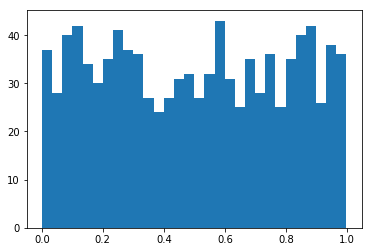

In [118]:
a=np.random.random(1000)
plt.hist(a,30)
plt.show()

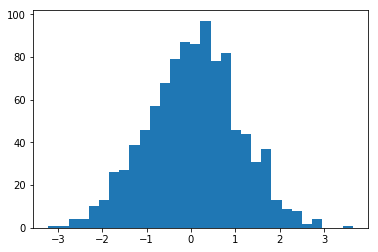

In [119]:
b=np.random.randn(1000)
plt.hist(b,30)
plt.show()

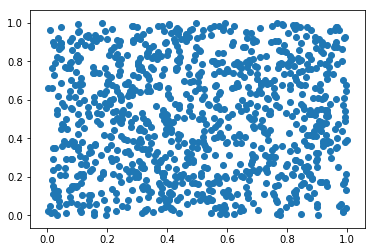

In [124]:
c=np.random.random((1000,1000))
plt.scatter(c[0],c[1])

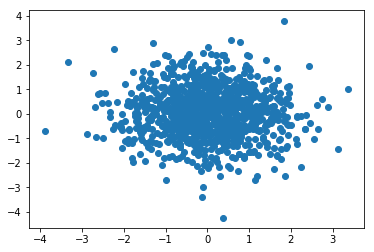

In [126]:
d=np.random.randn(1000,1000)
plt.scatter(d[0],d[1])

## 標準差

In [130]:
a=[1,2,3,4]
np.std(a)

1.118033988749895

In [137]:
df=pd.read_excel('data.xlsx',sheet_name='成績總表')
df.head()

考生姓名  ID   國文   數學   英文   地理   歷史   生物   物理   化學
0  陳小明   1   59   54   58   41   76   42   39   75
1  王小強   2  100  100  100  100  100  100  100  100
2  林小飛   3   41   51   71   64   42   41   57   71
3  鄭小新   4    0    0    0    0    0    0    0    0
4  陳小路   5    3    5    4    3    3    4    3    4

In [138]:
df['標準差']=df.iloc[:,2:].std(axis=1)
df

考生姓名  ID   國文   數學   英文   地理   歷史   生物   物理   化學        標準差
0   陳小明   1   59   54   58   41   76   42   39   75  14.570028
1   王小強   2  100  100  100  100  100  100  100  100   0.000000
2   林小飛   3   41   51   71   64   42   41   57   71  12.947697
3   鄭小新   4    0    0    0    0    0    0    0    0   0.000000
4   陳小路   5    3    5    4    3    3    4    3    4   0.744024
5   黃小意   6  100   88   70  100   80   96   99   90  10.822430
6   蘇小傑   7  100   88   70   36   58   52   36   61  22.834420
7   吳小冠   8  100   88   70   80   90   30   37   95  26.526267
8   黃小敏   9   33   39   25   21   37   22   24   11   9.319718
9   張小月  10   28   31   22   29   25   33   30   26   3.545621
10  賴小如  11   79   84   74   73   45   59   73   60  12.738440
11  侯小茗  12   19   21   17   16   18   18   16   17   1.669046
12  鄭小晞  13   53   38   48   35   47   38   45   34   6.923046
13  金小武  14   69   55   71   77   84   61   50   66  11.198693
14  張小貴  15   87   97   74   83   60   70   61   87  13.298093
15  許小揚  16   36   31   48   31   51   47   53   48   8.999008
16  劉小華  17   38   31   37   44   36   33   39   29   4.793969
17  陳小寶  18   47   56   38   45   49   35   30   51   8.790214
18  趙小民  19   87   77   47   52   72   84   51   50  16.699016
19  鄧小貴  20   45   33   41   28   36   35   24   23   7.809106
20  何小魚  21   39   43   64   51   52   43   42   55   8.399617

In [140]:
df.iloc[:,2:-1].std(axis=0)

國文    31.969479
數學    29.903655
英文    25.998993
地理    29.088617
歷史    26.923260
生物    26.487553
物理    25.861444
化學    30.244480
dtype: float64

## 驗證標準差

In [145]:
a=np.random.randn(1000)
m=a.mean()
s=a.std()

In [153]:
mask=np.logical_and(a>m-s,a<m+s)
len(a[mask])/len(a)

0.697

In [154]:
mask=np.logical_and(a>m-s*2,a<m+s*2)
len(a[mask])/len(a)

0.95

In [155]:
mask=np.logical_and(a>m-s*3,a<m+s*3)
len(a[mask])/len(a)

0.997

一個標準差68%

兩個標準差95%

三個標準差99.7%

標準差涵蓋範圍

## 概率分布函數

In [175]:
a=np.random.randn(1000)+5
b=np.random.randn(1000)*2
c=[[4,5,8],[0,0,0]]

In [176]:
cc=np.histogram(a,40)
len(cc[0]),len(cc[1])

(40, 41)

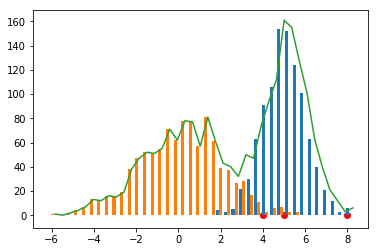

In [182]:

dd=plt.hist((a,b),40)
plt.scatter(c[0],c[1],c='r')
ee=np.histogram([a,b],40)
plt.plot(ee[1][1:],ee[0])
# plt.plot(cc[1][1:],cc[0])
plt.show()
# ee

In [163]:
len(dd[0])

40

In [164]:
len(dd[1])

41

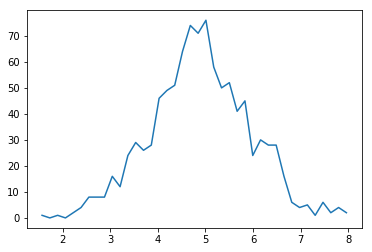

In [167]:
plt.plot(dd[1][:-1],dd[0])